Implementing Portfolio Insurance (CPPI) and Drawdown Constraints

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risk_tools as rt
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
ind_return = rt.get_ind_returns()
tmi_return = rt.get_total_market_index_returns()

In [9]:
risky_return = ind_return['2000':][['Steel', 'Fin', 'Beer']]
risky_return.shape

(228, 3)

In [10]:
safe_return = pd.DataFrame().reindex_like(risky_return)
safe_return.shape

(228, 3)

In [11]:
safe_return[:] = 0.03/12
safe_return.head()

,Steel,Fin,Beer
2000-01,0.0025,0.0025,0.0025
2000-02,0.0025,0.0025,0.0025
2000-03,0.0025,0.0025,0.0025
2000-04,0.0025,0.0025,0.0025
2000-05,0.0025,0.0025,0.0025


In [12]:
rt.summary_stats(risky_return)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharp Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [15]:
back_test_results = rt.run_cppi(risky_return)
rt.summary_stats(back_test_results['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharp Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


<AxesSubplot:>

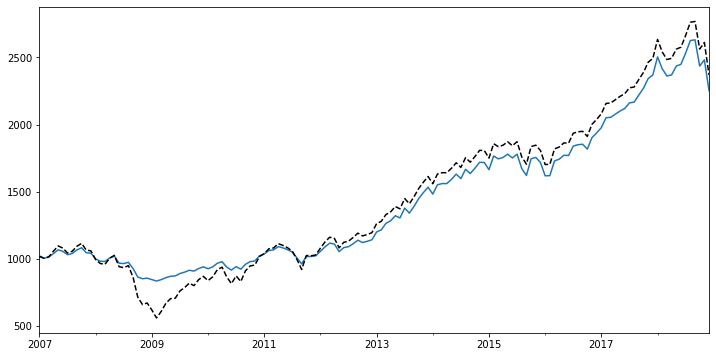

In [17]:
btr = rt.run_cppi(tmi_return['2007':])
ax = btr['Wealth'].plot(figsize=(12, 6), legend=False)
btr['Risky Wealth'].plot(ax=ax, style='k--', legend=False)


In [19]:
rt.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharp Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


In [21]:
rt.summary_stats(btr['Wealth'].pct_change().dropna())


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharp Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


Drawdown Constraint


<AxesSubplot:>

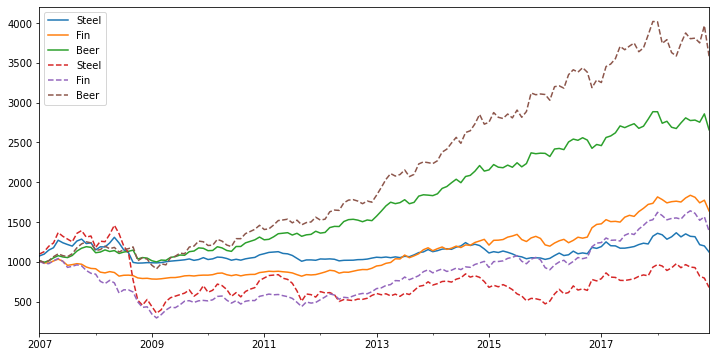

In [23]:
btr = rt.run_cppi(ind_return['2007':][['Steel', 'Fin', 'Beer']], drawdown=0.25)
ax = btr['Wealth'].plot(figsize=(12, 6))
btr['Risky Wealth'].plot(ax=ax, style='--')

In [27]:
rt.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharp Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [28]:
rt.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharp Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186
